# Assignment 1 - Julia Exercises_Section_2.1_2.4

### Julia Exercise 2.1 - Energy via integration

The energy in a pulse x(t) is given by E=∫−∞ ∞ |x (t)| 2 dt
This can be approximated by E=∫t1 t2 p(t)dt ≈ ∑n=0 N−1p (t1+nΔt) Δt where p(t)=|x(t)|2

Here we summing up the areas of rectangles (like in a Riemann sum), which can be made
accurate by choosing a sufficiently small time step Δt. (Note: There are more accurate
numerical methods, like Simpson’s Rule.)

a) Write Julia code to calculate the energy via numerical integration. Sample code below:

In [49]:
using Pkg
using PyPlot
#pyplot()

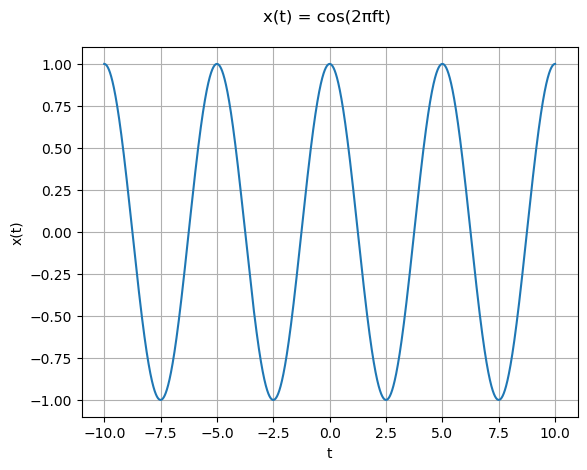

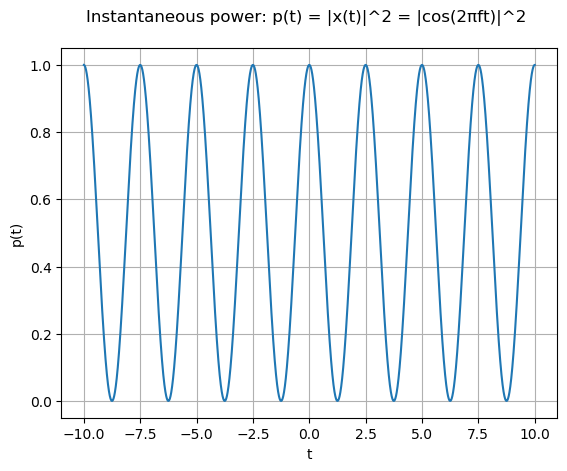

Energy =∫|x(t)|^2.dt = 10.001


In [125]:
t1=-10 ; t2= 10 ; Δt= 0.001 ;
t=t1:Δt:t2; # or use t=range(t1, t2, step=Δt)
function my_function(t, f)
    r = cos.(2 * π * f * t)
    return r
end
x = my_function(t, 0.2) # fill an array x with function values
ipower = (abs.(x)).^2 # instantaneous power
Energy = sum(ipower)*Δt # Calculate energy by integration
figure()
plot(t,x)
grid("on")
xlabel("t")
ylabel("x(t)")
title("x(t) = cos(2πft) \n")
figure(); 
plot(t,ipower)
println("Energy =∫|x(t)|^2.dt = ",Energy)
grid("on")
xlabel("t")
ylabel("p(t)")
title("Instantaneous power: p(t) = |x(t)|^2 = |cos(2πft)|^2 \n");

b) Use your code to calculate the energy of a sinusoidal pulse of length T=1 second, and
frequency f0=6 Hz, and amplitude A=10. 

x(t)=A*rect(t/T)cos(2π*f0*t)

Also show plots of x(t) and instantaneous power p(t).
Note: Define a rect() function as follows: rect(t)=(abs.(t).<=0.5).*1.0

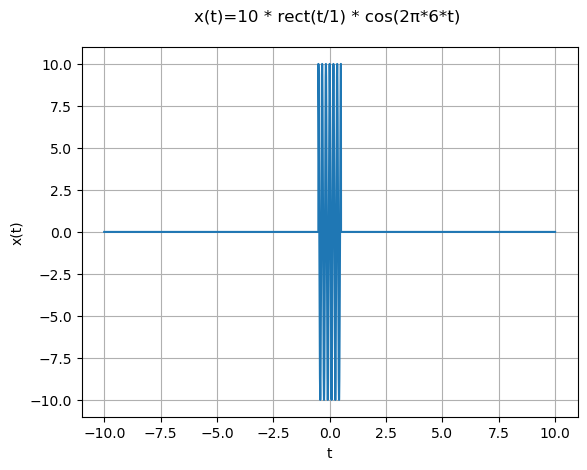

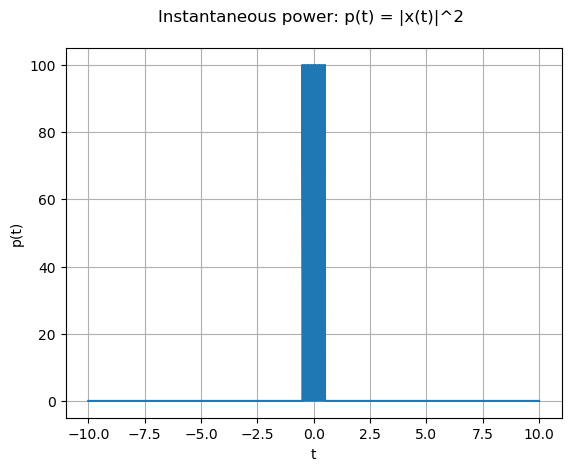

The energy is = 50.10000000000001


In [126]:
f0 = 6
A = 10
T = 1
rect(t)=(abs.(t).<=0.5).*1.0

x_t=A*rect(t/T).*cos.(2*π*f0*t)

p = (abs.(x_t)).^2 # instantaneous power
E = sum(p)*Δt # Calculate energy by integration
println("The energy is = $E")

figure()
plot(t,x_t)
grid("on")
xlabel("t");
ylabel("x(t)")
title("x(t)=10 * rect(t/1) * cos(2π*6*t) \n")

figure()
plot(t,p)
grid("on")
xlabel("t")
ylabel("p(t)")
title("Instantaneous power: p(t) = |x(t)|^2 \n");


c) Calculate the energy of the impulse response of an ideal LPF of unit-gain and
bandwidth B=1 Hz:

h(t)=2 B Sa (2 π Bt)

In [52]:
function h_t(t, B)
    x = 2π * B * t
    h = 2 * B * sin.(x)./x
    md = convert(Int64, floor(length(h) / 2)) + 1
    h[md]=2*B
    return h
end

# B = 1 Hz in this case
t0=-10:0.001:10
h0 = h_t(t0, 1)

x0=1*rect(t0/T).*h0

p0 = (abs.(x0)).^2 # instantaneous power
E0 = sum(p0)*0.001 # Calculate energy by integration
println("The energy is = $E0")

The energy is = 1.8056466671616278


### Julia Exercise 2.2 - Plotting filter impulse response

a) The impulse response h(t) of an ideal LPF of bandwidth B Hz and unity gain is (see Drill Problem 2.6): h(t)=2BSa(2πBt) Write Julia code to plot the waveform for case B = 1 Hz.

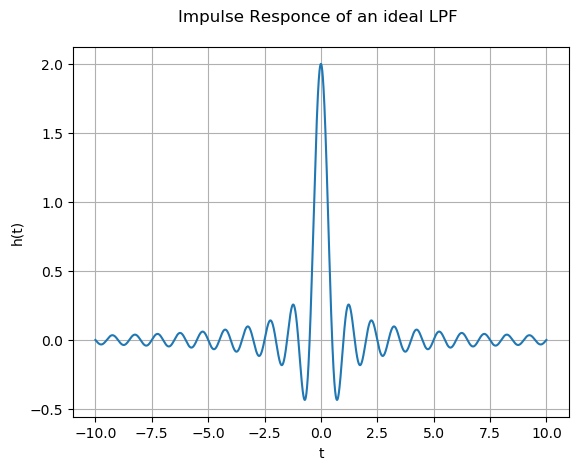

In [127]:
# Using h(t) from question 2.1

B = 1 
t = - 10 * B: 0.001 : 10 * B

h = h_t(t,B)

plot(t, h)
grid("on")
xlabel("t")
ylabel("h(t)")
title("Impulse Responce of an ideal LPF \n");

b) By inspection of the waveform (and/or samples displayed) determine the
approximate width of the main lobe, measured between the 3dB points.
(it should be approximately δt ≈0.44/B)

In [54]:
function half_3dB_width(func, val)
    k = 1;
    len = length(func);
    while k <= len
        if func[k] >= val
            return t[k]
        end
        k += 1
    end
    return 0
end

#δt = 0.44 / B
δt = 2 * abs(half_3dB_width(h, 2 * B * 0.707))


println("The 3dB Width is: δt ≈ $δt");

The 3dB Width is: δt ≈ 0.442


c) Write Julia code to plot the impulse response of an ideal BPF, of bandwidth
B and centre frequency ω0
. Specify B = 1 Hz and centre frequency f0 = 4 Hz.
The formula was derived in Drill Problem 2.7 
h(t)=2 B Sa (π Bt)cos(ω0t)

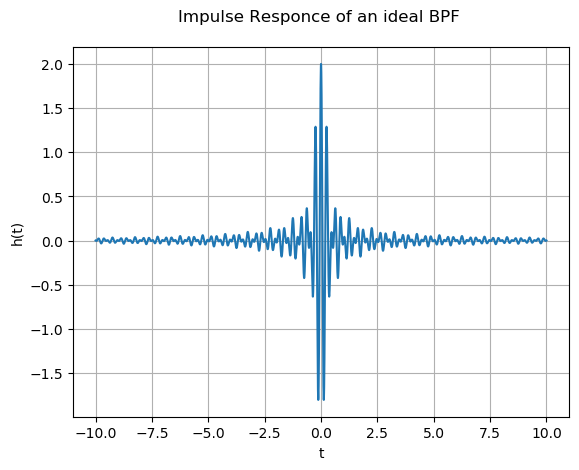

In [128]:
f1 = 4
w0 = 2 * π * f1 
B = 1
t1 = -10: 0.001 : 10

#T = 2 * π * B
#w = -1.2 * w0 : 0.1 : 1.2 * w0
#Hw = rect.((w .+ w0)/T) + rect.((w .- w0)/T)

h1= h_t(t1, B) .* cos.(w0 .* t1)

plot(t1, h1)
grid("on")
xlabel("t");
ylabel("h(t)");
title("Impulse Responce of an ideal BPF \n");

### Julia Exercise 2.3 - Step response via integration

In Section 2.2 of the lecture notes, it is shown that the response y(t) of a filter to a unit-step
function u(t) can be found by integrating its impulse response h(t).
The integral may be evaluated by numerical integration:
This must be performed for a range of t values. Julia provides a special function “cumsum(X)”
which cumulatively sums the values in array X (a column vector), creating an output array

a) Write Julia code to calculate and plot the step response of an ideal LPF for case B=1 Hz.
 The impulse response is h(t)=2 B Sa(2 π Bt)

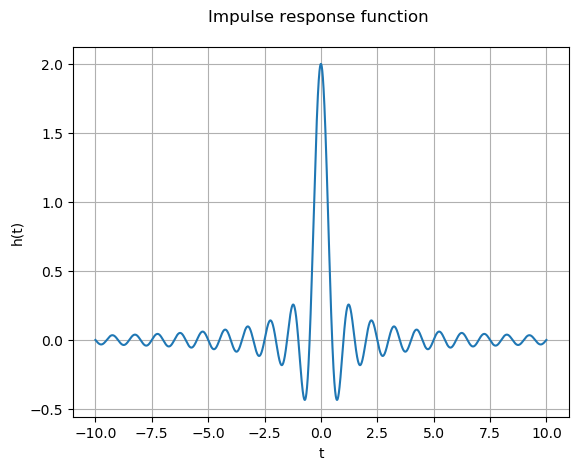

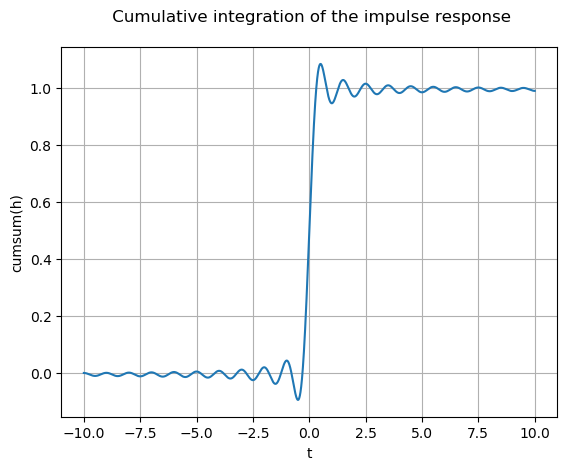

In [129]:
Δτ = 0.001
t2=-10:Δτ:10
B = 1

#t0 = t1
#t_Δ = t0 .+ Δτ * t


h2 = h_t(t2, B) # impulse response function
#println(h2)
y = cumsum(h2)*Δτ # cumulatively integrate
figure() 
plot(t2,h2) 
grid("on")
xlabel("t");
ylabel("h(t)");
title("Impulse response function \n")

figure() 
plot(t2,y) # Inspect plots.
grid("on");
xlabel("t");
ylabel("cumsum(h)");
title(" Cumulative integration of the impulse response\n");

b) By inspection/analysis of the step response, determine the 10% to 90% rise time. Does the value agree with the value stated in Section 2.2. of the lecture notes? i.e. tr = 0.446/B ≈ 1/(2B).

In [57]:
rise_t = half_3dB_width(y, 0.9) - half_3dB_width(y, 0.1)
rise_time = 0.446 / B

println("The observed rise time  is $rise_t");
println("The value of 0.446/B = $rise_time")

The observed rise time  is 0.446
The value of 0.446/B = 0.446


Yes

### Julia Exercise 2.4 - Plotting Periodic functions

You may recall Drill Problem 2.12 which involved determining the period of the function
v(t) = 4 cos (20πt) + 2 cos (30πt)
Write Julia code to:

a) plot the function 4 cos (20πt) as a function of t over a specified interval from t1 to t2
with a specified time step Δt.

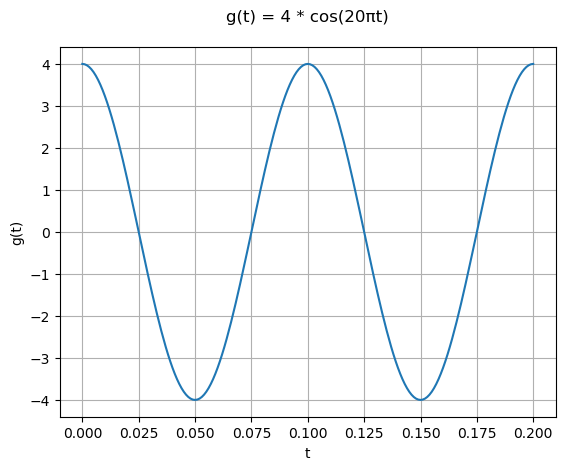

In [130]:
t3= 0 : 0.001: 0.2
g = 4*cos.(20π*t3)
figure() 
plot(t3,g) 
grid("on")
xlabel("t");
ylabel("g(t)");
title("g(t) = 4 * cos(20πt)\n");

b) plot the function 2 cos (30πt) over the same interval

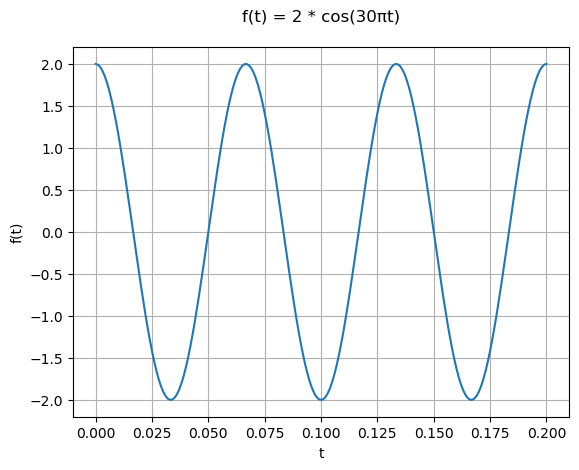

In [131]:
f = 2*cos.(30π*t3)
figure() 
plot(t3,f) 
grid("on")
xlabel("t");
ylabel("f(t)");
title("f(t) = 2 * cos(30πt)\n");

c) plot v(t) = 4 cos (20πt) + 2 cos (30πt) over the same interval

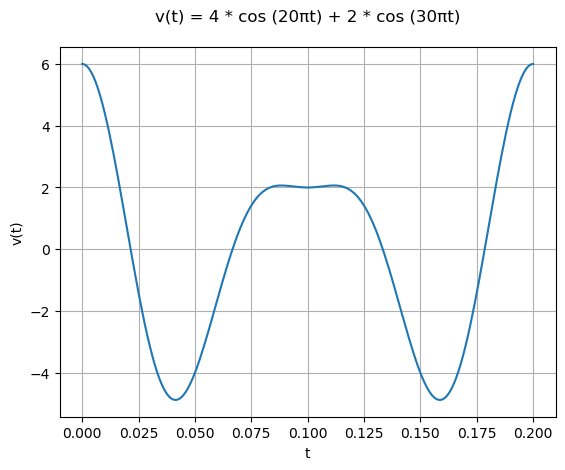

In [132]:
v = g .+ f

figure() 
plot(t3,v) 
grid("on")
xlabel("t");
ylabel("v(t)");
title("v(t) = 4 * cos (20πt) + 2 * cos (30πt)\n");

d) By inspection of your plot, determine the period of the waveform v(t) in seconds, and
use it to calculate the fundamental frequency. Compare your answer with the value
determined in Drill Problem 2.12

In [133]:
period = 0.2


println("Period : $period s")
println("Fundamental Frequency : $(1 / period) Hz")


Period : 0.2 s
Fundamental Frequency : 5.0 Hz
